# Data Visualization of Car Parking 

In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

## Reading Data from .csv file
* We will be using the parking data for the period of 1 year starting from 2020/01/01 to 2020/12/31 
* However, it is impossible for us to collect parking data for the whole year. 
* Therefore, the data will be generated from our generator and that will be used to visualize. 
* There will be 3 columns such as Floor_slot which is the parking location, Availability which is the indication of whether or not the parking slot is occupied and last but not least, Timestamp. 
* There will be over 21 million data of the parking status in this .csv file as per below.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv ('C:/Users/LinH/Downloads/carpar_analysis/data.csv')
df.columns = ['Floor_slot','Availability','Timestamp']
print(df)

         Floor_slot Availability            Timestamp
0              F1_1    available  2020-01-01 09:00:00
1              F1_2    available  2020-01-01 09:00:00
2              F1_3    available  2020-01-01 09:00:00
3              F1_4    available  2020-01-01 09:00:00
4              F1_5    available  2020-01-01 09:00:00
...             ...          ...                  ...
21410995      F3_21    available  2020-12-31 21:59:00
21410996      F3_22    available  2020-12-31 21:59:00
21410997      F3_23    available  2020-12-31 21:59:00
21410998      F3_24    available  2020-12-31 21:59:00
21410999      F3_25    available  2020-12-31 21:59:00

[21411000 rows x 3 columns]


## Comparison of Parking slots availability for the whole year
* We distinguished the numbers of available and occupied parking slots over the year from 21 million data.
* Why? Because we can know that how many parking slots would be occupied, and can even be used that data in case we want to know how much money might be generated from parkings.
* We plotted the overall available and occupied parking slots in bar graph (numbers of slots) and pie chart (percentage of slots).

21411000
21411000
the total number of Available Parking is 8050613
the total number of Unavailable Parking is 13360387


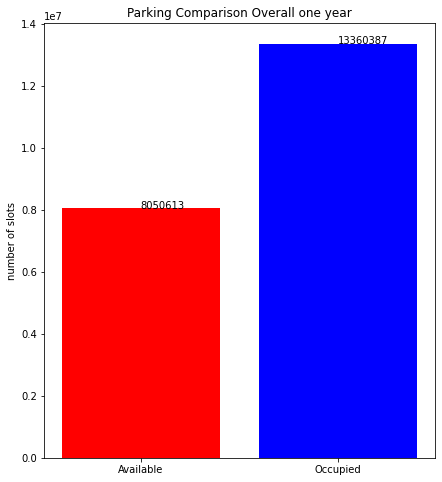

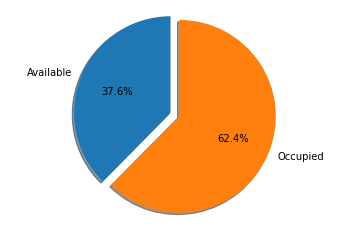

In [3]:
data_floor = df.Floor_slot
data_available = df.Availability
data_floor_list= list( data_floor.dropna()) 
data_available_list = list(data_available.dropna())
total_floor = 0
total_available = 0
total_unavailable = 0
print(len(data_floor_list))
print(len(data_available_list))
for slots in  data_available_list:
  if slots == 'available':
    total_available = total_available + 1
  elif slots == 'occupied':
    total_unavailable = total_unavailable +1 
print(f"the total number of Available Parking is {total_available}")
print(f"the total number of Unavailable Parking is {total_unavailable}")

n_available = total_available
n_occupied = total_unavailable
total_parkings = [n_available, n_occupied]

slots = ("Available", "Occupied")
y_pos = np.arange(len(total_parkings))
colors = ['r', 'b']
plt.figure(figsize=(7, 8))
plt.bar(y_pos, total_parkings, align='center', color=colors)
plt.xticks(y_pos, slots)

plt.ylabel("number of slots")
plt.title("Parking Comparison Overall one year")
for i in range(len(total_parkings)):
    plt.text(i, total_parkings[i]+10, str(total_parkings[i]))
plt.show()
labels = 'Available', 'Occupied'
sizes = [n_available,n_occupied]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [4]:
df.count()

Floor_slot      21411000
Availability    21411000
Timestamp       21411000
dtype: int64

In [5]:
display(df.describe())

,Floor_slot,Availability,Timestamp
count,21411000,21411000,21411000
unique,75,2,285480
top,F2_3,occupied,2020-06-12 09:33:00
freq,285480,13360387,75


## Visualization of the Average Occupied Parking Slot for A Day
* We plotted the average percentage of occupied slot for a day.
* We observed the data between morning 9:00am to night 21:00pm.
* We can observe that the peak hours of parking slots is between 16:00 pm and 19:00 pm as per following graph.

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.index = df['Timestamp']

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Time: From morning to night')

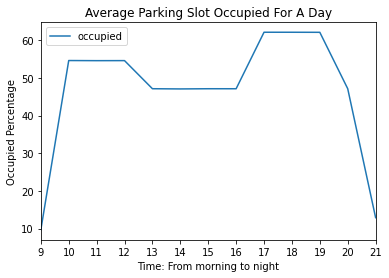

In [8]:
tdf = df.groupby(df.index)['Availability'].apply(lambda x: (x == 'occupied').sum()).reset_index(name="occupied")
tdf.index = tdf['Timestamp']
occupied_percent = tdf.groupby(tdf.index)['occupied'].apply(lambda x: (x/75)*100).reset_index(name="percent_occupied")
occupied_percent.index = occupied_percent['Timestamp']
print(type(tdf), type(occupied_percent))
tdf.groupby(tdf.index.hour).mean().plot(xticks=tdf.index.hour.unique())
plt.title("Average Parking Slot Occupied For A Day")
plt.ylabel("Occupied Percentage")
plt.xlabel("Time: From morning to night")

## Visualization of the Average Free Parking Slot for A Day
* We plotted the average percentage of free parking slot for a day.
* We observed the data between morning 9:00am to night 21:00pm.
* We can observe that normally, most of our parking slots are occupied except the early morning around 9am and the ngiht around 21:00 pm.
* So, we can conclude that our parking slots are quite useful for the cars around there and might generate decent amount of money since many of the slots are busy.

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Text(0.5, 0, 'Time: From morning to night')

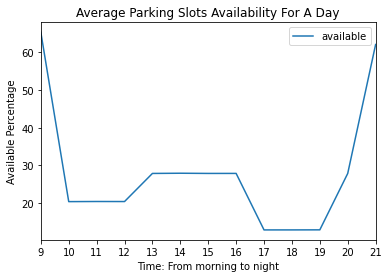

In [15]:
tdf = df.groupby(df.index)['Availability'].apply(lambda x: (x == 'available').sum()).reset_index(name="available")
tdf.index = tdf['Timestamp']
occupied_percent = tdf.groupby(tdf.index)['available'].apply(lambda x: (x/75)*100).reset_index(name="percent_available")
occupied_percent.index = occupied_percent['Timestamp']
print(type(tdf), type(occupied_percent))
tdf.groupby(tdf.index.hour).mean().plot(xticks=tdf.index.hour.unique())
plt.title("Average Parking Slots Availability For A Day")
plt.ylabel("Available Percentage")
plt.xlabel("Time: From morning to night")